## 1. Importing Libraries

This section imports necessary libraries: pandas for data handling, networkx for graph operations, and matplotlib for plotting.

In [4]:
import pandas as pd
import networkx as nx
from networkx.algorithms.community import greedy_modularity_communities
import matplotlib.pyplot as plt

## 2. Load Data and Prepare Graph

Loads node and edge data from CSV files and organizes the edges into layers.

In [17]:
# Load nodes from CSV
nodes_df = pd.read_csv("Actors_Dataset.csv")  # Replace with the path to your nodes CSV file
nodes = {
    row["id"]: {"name": row["name"], "CGPA": row["CGPA"], "hub": row["hub"], "hometown": row["hometown"]}
    for _, row in nodes_df.iterrows()
}

# Load edges from CSV
edges_df = pd.read_csv("Edges_Dataset.csv")  # Replace with the path to your edges CSV file

# Group edges by layer
layers = {}
for layer, group in edges_df.groupby("Layer"):
    layers[layer] = list(zip(group["Node 1"], group["Node 2"]))

## 3.  Graph Analysis and Visualization

Defines a function to analyze the graph's properties, including centrality, clustering coefficients, assortativity, modularity, and visualizations of the graph and distributions.

In [14]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.community import greedy_modularity_communities
import pandas as pd

def analyze_graph(graph, layer_name=None):
    # Print the title of analysis
    title = f"Layer: {layer_name}" if layer_name else "Multilayer Graph"
    print(f"\n{'='*10} Analysis for {title} {'='*10}")

    # Basic Graph Information
    print("\nBasic Graph Information:")
    basic_info = {
        "Number of Nodes": graph.number_of_nodes(),
        "Number of Edges": graph.number_of_edges(),
        "Density": f"{nx.density(graph):.4f}"
    }
    for key, value in basic_info.items():
        print(f"{key}: {value}")

    # Centrality Metrics
    degree_centrality = nx.degree_centrality(graph)
    betweenness_centrality = nx.betweenness_centrality(graph)
    
    # Clustering Coefficient
    clustering_coeff = nx.clustering(graph)

    # Core Numbers
    core_numbers = nx.core_number(graph)

    # Create a DataFrame for node-level metrics
    node_metrics = pd.DataFrame({
        "Node": list(graph.nodes()),
        "Degree Centrality": pd.Series(degree_centrality),
        "Betweenness Centrality": pd.Series(betweenness_centrality),
        "Clustering Coefficient": pd.Series(clustering_coeff),
        "Core Number": pd.Series(core_numbers),
    })
    print("\nNode-Level Metrics (Top 10 Nodes):")
    print(node_metrics.head(10).to_string(index=False))

    # Assortativity Coefficient
    assortativity = nx.degree_assortativity_coefficient(graph)
    print(f"\nAssortativity Coefficient: {assortativity:.4f}")

    # Community Detection
    print("\nCommunity Detection:")
    communities = list(greedy_modularity_communities(graph))
    modularity = nx.community.modularity(graph, communities)
    print(f"Modularity: {modularity:.4f}")
    for i, comm in enumerate(communities):
        print(f"Community {i+1}: {list(comm)}")

    # Visualization: Network Graph
    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(graph, seed=42)
    color_map = []
    for i, community in enumerate(communities):
        color_map.extend([i] * len(community))
    nx.draw_networkx(
        graph, pos, with_labels=True, node_color=color_map, cmap=plt.cm.Set3, node_size=500, font_size=8, font_color="black"
    )
    plt.title(f"{title}\nNetwork Graph with Communities", fontsize=14)
    plt.show()

    # Visualization: Degree Distribution
    degrees = [deg for _, deg in graph.degree()]
    plt.figure(figsize=(10, 6))
    plt.hist(
        degrees, bins=range(min(degrees), max(degrees) + 2, 1), color="skyblue", edgecolor="black"
    )
    plt.title(f"{title}\nDegree Distribution", fontsize=14)
    plt.xlabel("Degree", fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()

    # Visualization: Degree Centrality
    plt.figure(figsize=(10, 6))
    plt.bar(degree_centrality.keys(), degree_centrality.values(), color="orange", width=0.8)
    plt.title(f"{title}\nDegree Centrality", fontsize=14)
    plt.xlabel("Node", fontsize=12)
    plt.ylabel("Degree Centrality", fontsize=12)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()

    # Visualization: Betweenness Centrality
    plt.figure(figsize=(10, 6))
    plt.bar(betweenness_centrality.keys(), betweenness_centrality.values(), color="green", width=0.8)
    plt.title(f"{title}\nBetweenness Centrality", fontsize=14)
    plt.xlabel("Node", fontsize=12)
    plt.ylabel("Betweenness Centrality", fontsize=12)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()


## 4. Analyzing Each Layer and Multilayer Graph

Analyzes each individual layer and a combined multilayer graph, performing the same graph analysis and visualizations for each layer as well as the overall network.


========== Analysis for Layer: hub_associations ==========

Basic Graph Information:
Number of Nodes: 35
Number of Edges: 36
Density: 0.0605

Node-Level Metrics (Top 10 Nodes):
 Node  Degree Centrality  Betweenness Centrality  Clustering Coefficient  Core Number
    2           0.058824                     0.0                     1.0            2
   13           0.058824                     0.0                     1.0            2
   20           0.058824                     0.0                     1.0            2
   53           0.058824                     0.0                     1.0            2
   61           0.058824                     0.0                     1.0            2
   74           0.058824                     0.0                     1.0            2
   83           0.058824                     0.0                     1.0            2
  101           0.058824                     0.0                     1.0            2
  118           0.058824                     0.0

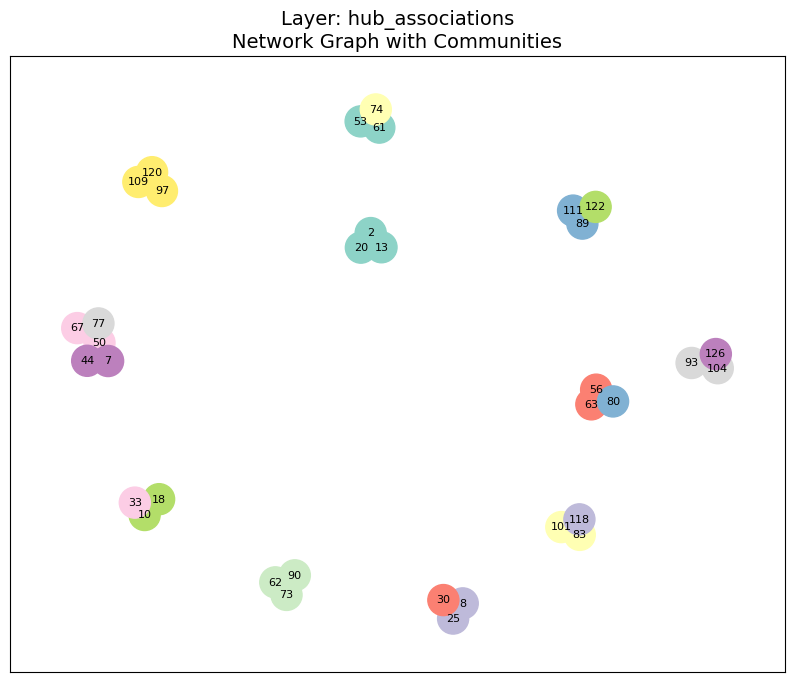

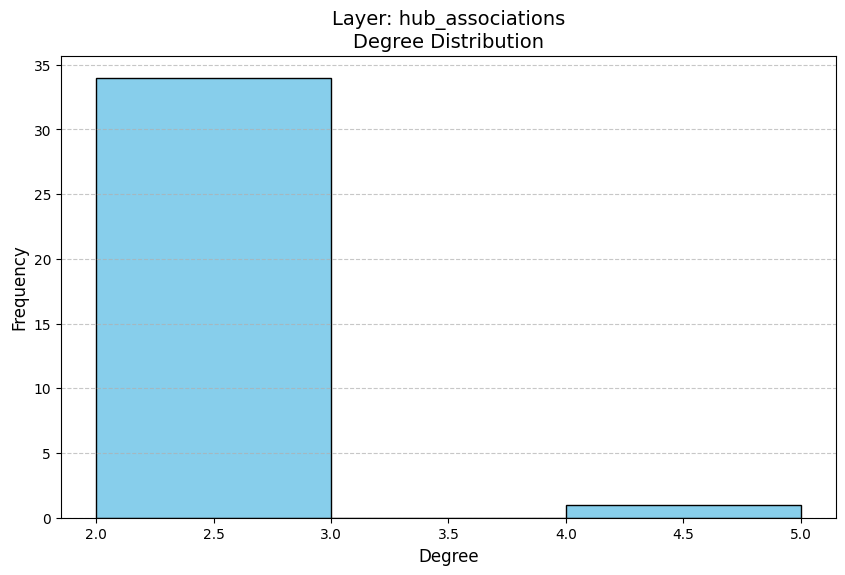

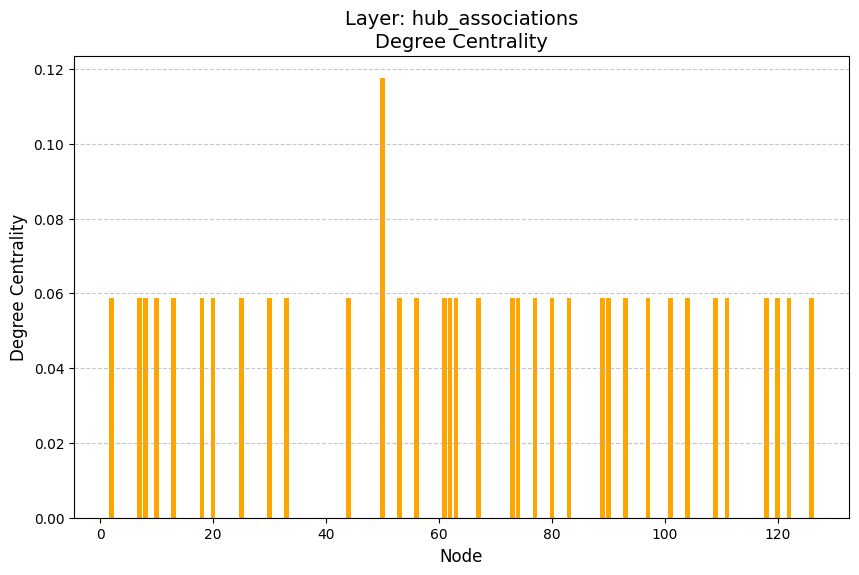

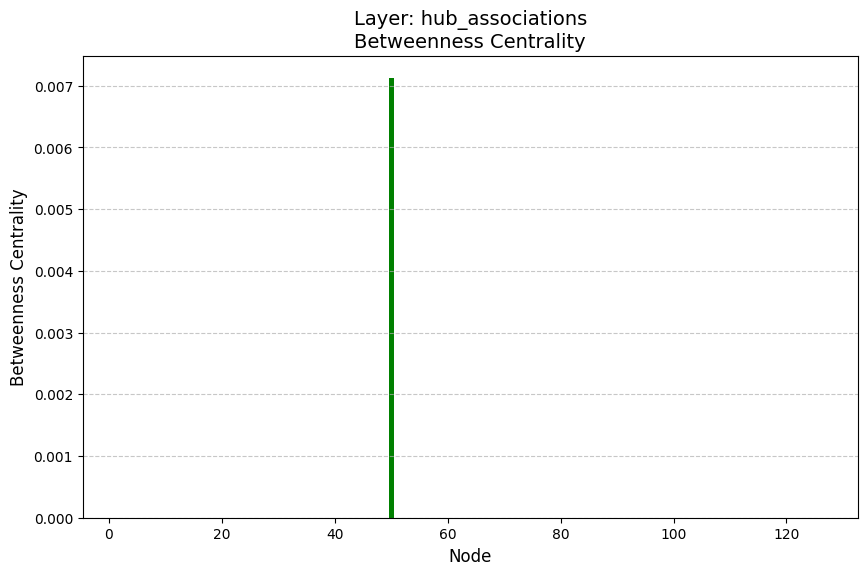


========== Analysis for Layer: social_media_mutuals ==========

Basic Graph Information:
Number of Nodes: 87
Number of Edges: 45
Density: 0.0120

Node-Level Metrics (Top 10 Nodes):
 Node  Degree Centrality  Betweenness Centrality  Clustering Coefficient  Core Number
    1           0.011628                0.000000                       0            1
   20           0.011628                0.000000                       0            1
    5           0.011628                0.000000                       0            1
   14           0.011628                0.000000                       0            1
   10           0.011628                0.000000                       0            1
   25           0.023256                0.000274                       0            1
    3           0.011628                0.000000                       0            1
   40           0.023256                0.000274                       0            1
    7           0.011628                0.00

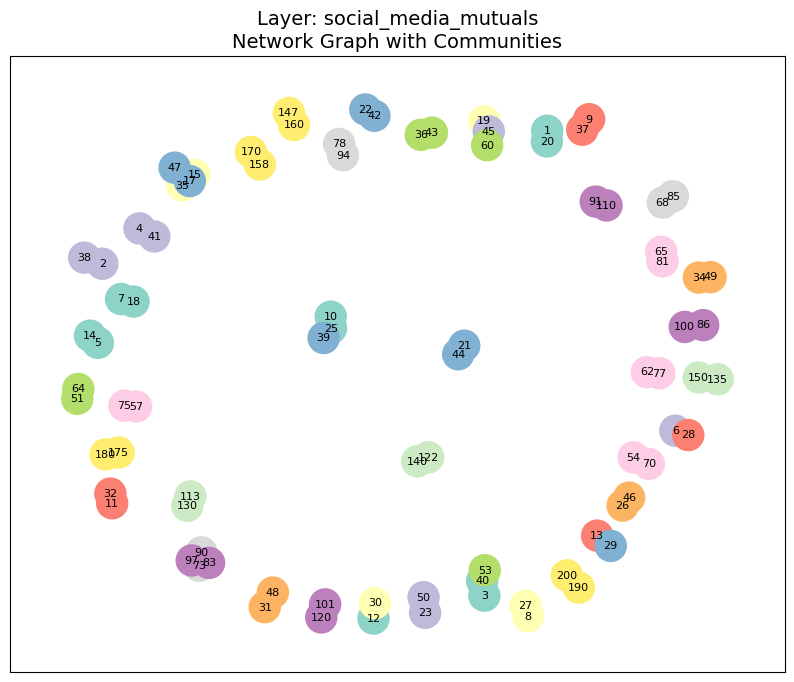

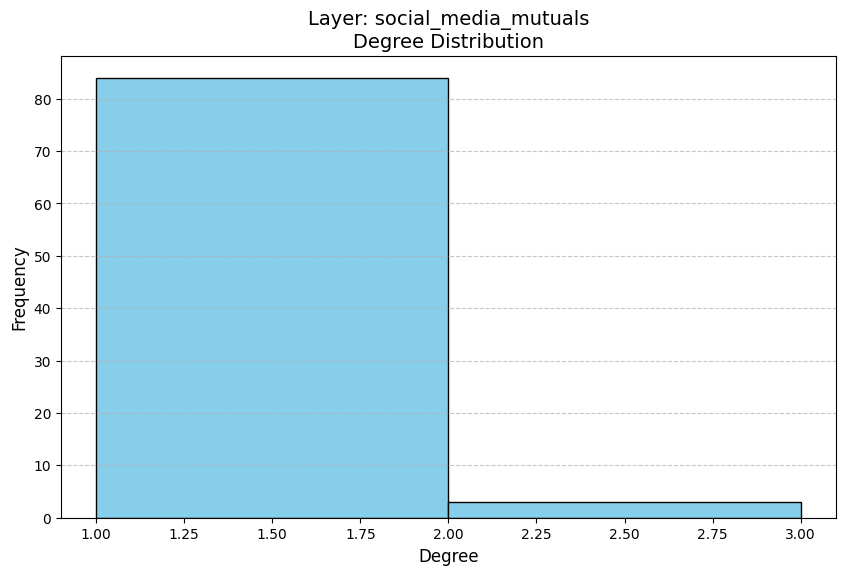

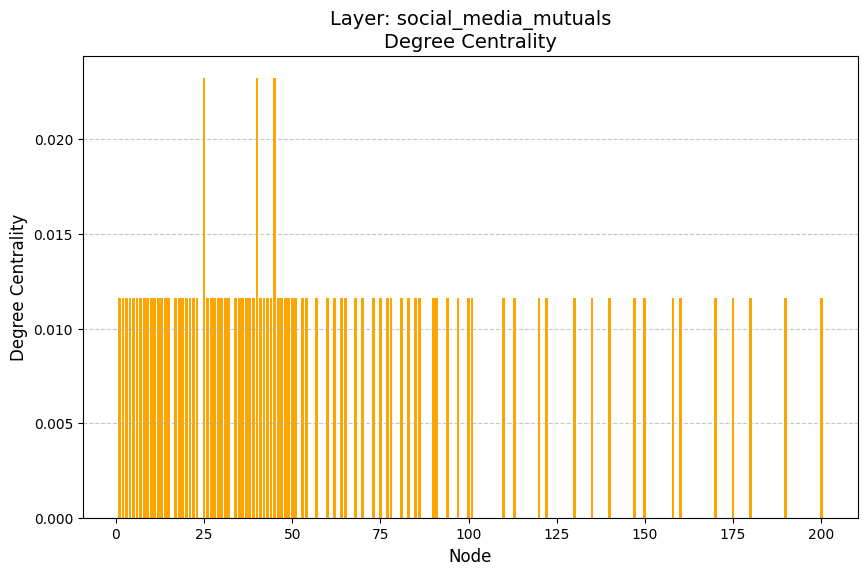

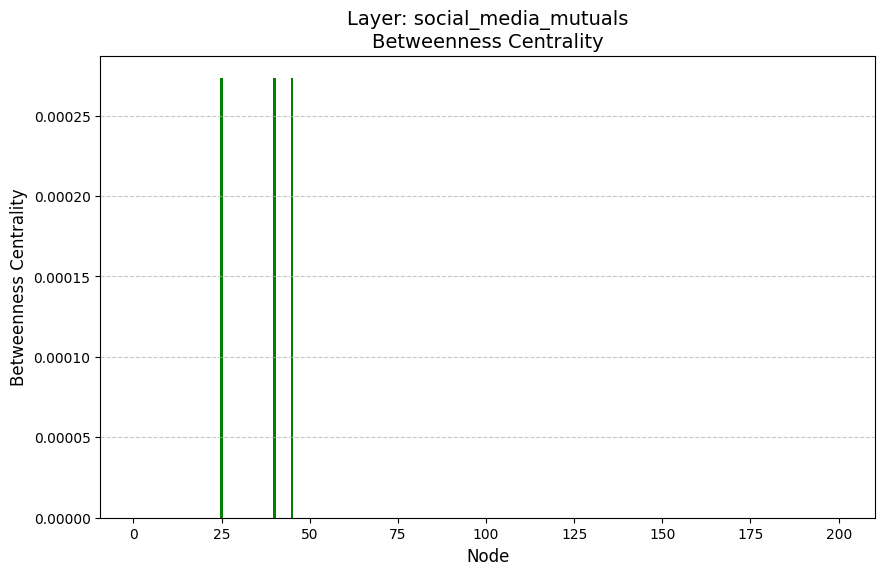


========== Analysis for Layer: study_groups ==========

Basic Graph Information:
Number of Nodes: 73
Number of Edges: 63
Density: 0.0240

Node-Level Metrics (Top 10 Nodes):
 Node  Degree Centrality  Betweenness Centrality  Clustering Coefficient  Core Number
    5           0.027778                0.000000                1.000000            2
   12           0.027778                0.000000                1.000000            2
   19           0.027778                0.000000                1.000000            2
   18           0.027778                0.000000                1.000000            2
   22           0.055556                0.003130                0.333333            2
   33           0.055556                0.003130                0.333333            2
   48           0.013889                0.000000                0.000000            1
   65           0.027778                0.000782                0.000000            1
   50           0.013889                0.000000    

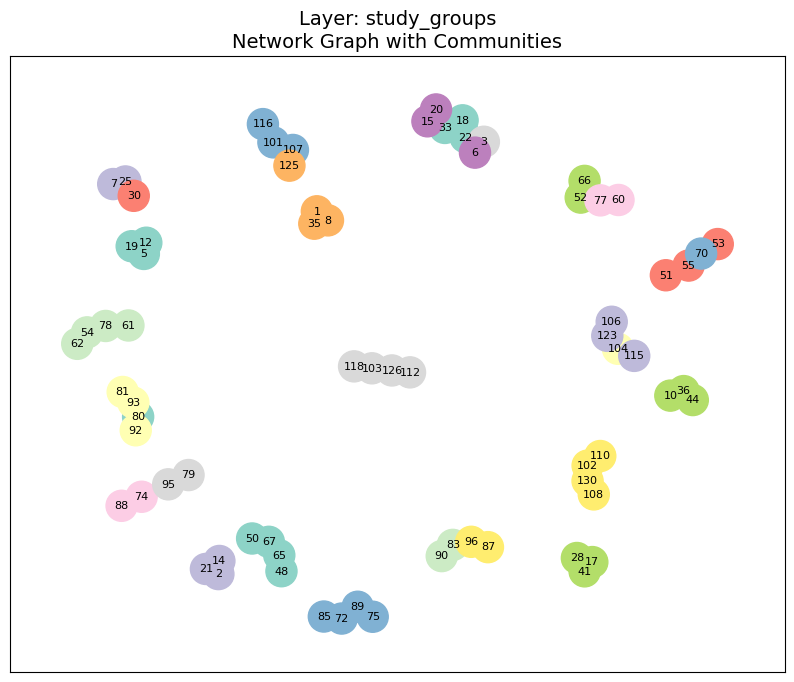

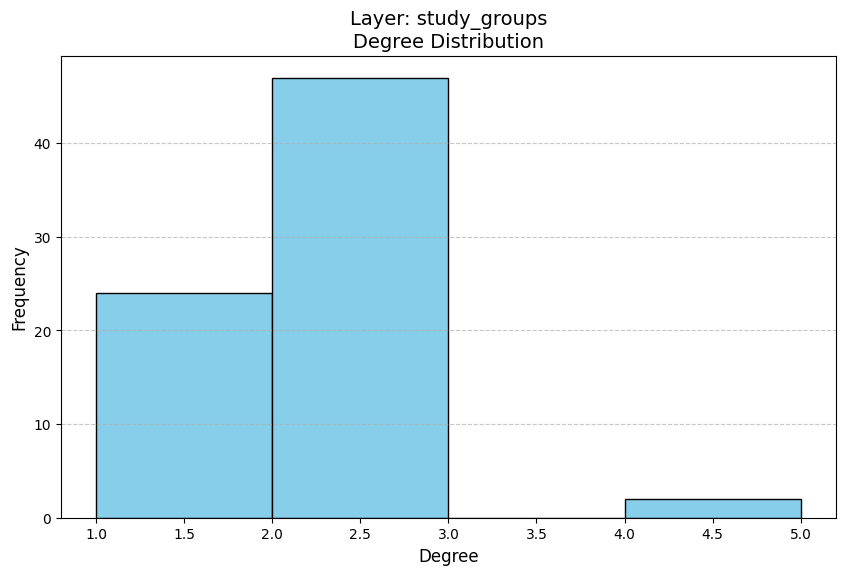

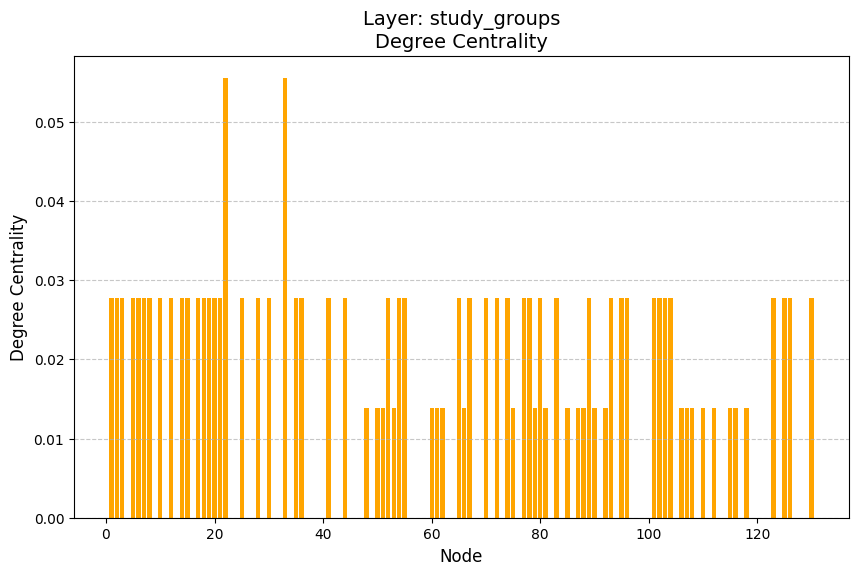

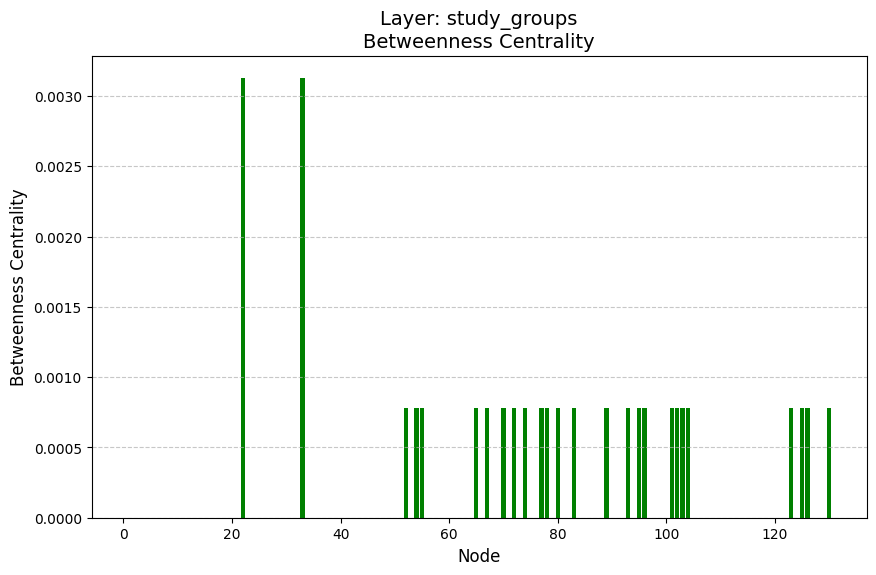


========== Analysis for Layer: Combined Graph ==========

Basic Graph Information:
Number of Nodes: 121
Number of Edges: 140
Density: 0.0193

Node-Level Metrics (Top 10 Nodes):
 Node  Degree Centrality  Betweenness Centrality  Clustering Coefficient  Core Number
    2           0.041667                0.033126                0.200000            2
   13           0.025000                0.011765                0.333333            2
   20           0.041667                0.026641                0.200000            3
   53           0.033333                0.065726                0.166667            2
   61           0.025000                0.017199                0.333333            2
   74           0.033333                0.034734                0.166667            2
   83           0.041667                0.111555                0.100000            2
  101           0.041667                0.042297                0.100000            2
  118           0.025000                0.036204

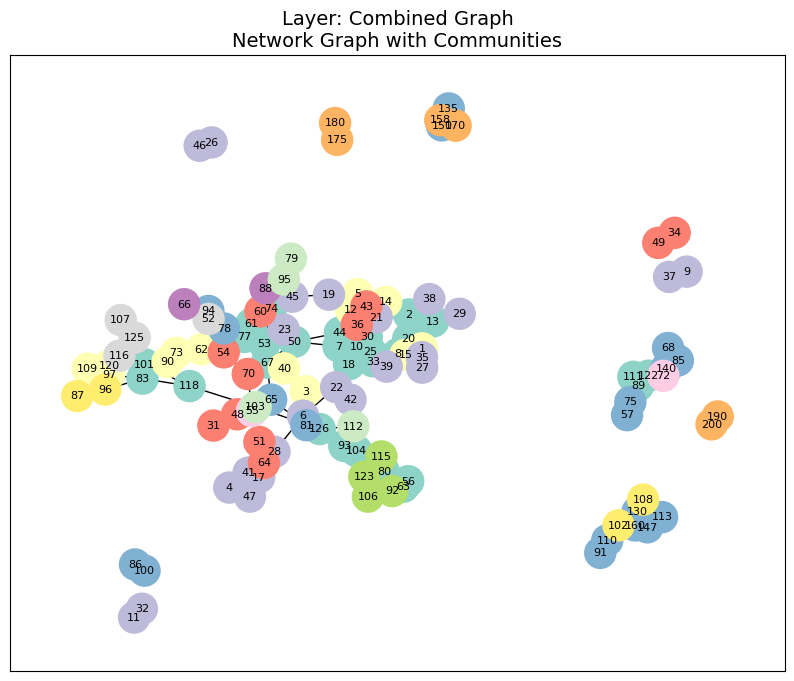

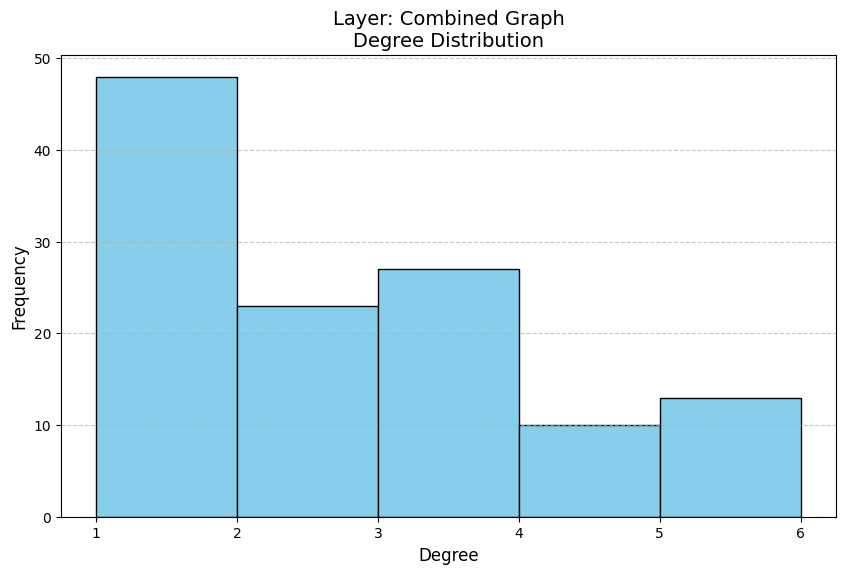

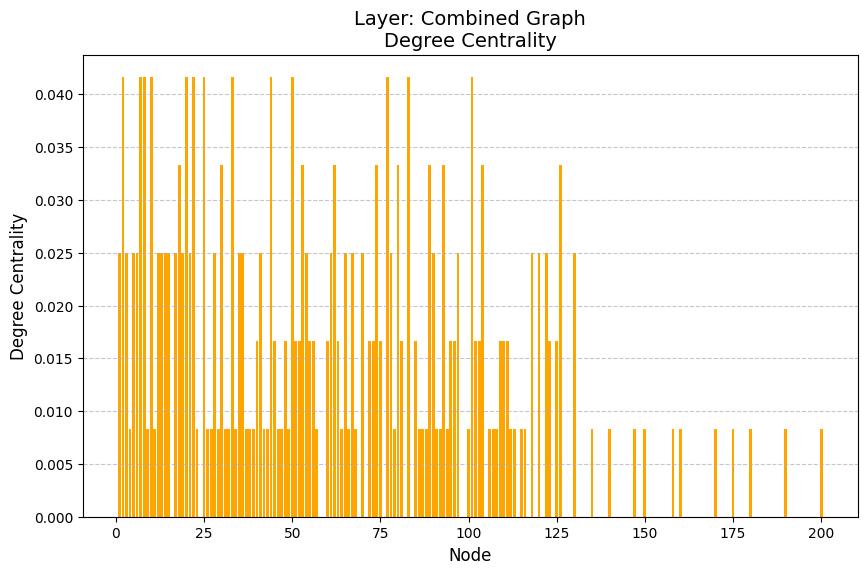

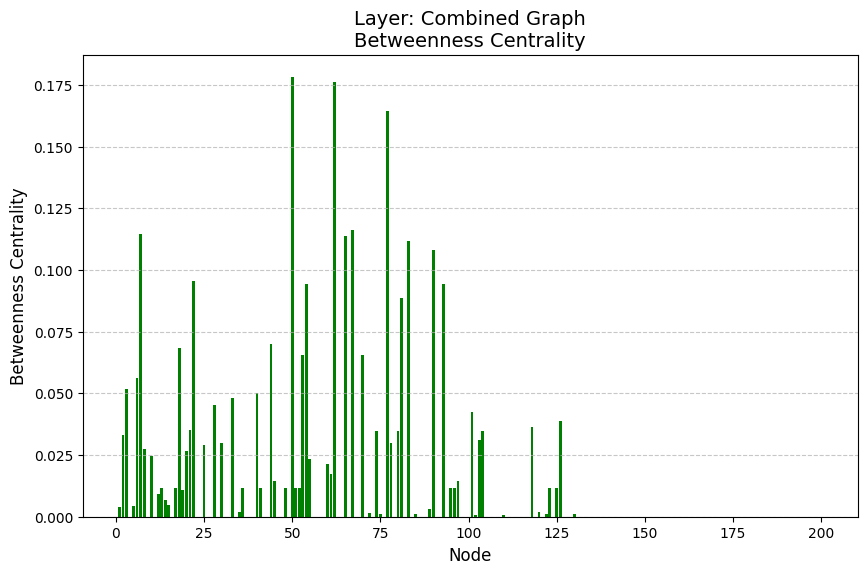

In [15]:
# Analyze each layer graph
all_graphs = {}
for layer_name, edges in layers.items():
    G = nx.Graph()
    G.add_edges_from(edges)
    nx.set_node_attributes(G, nodes)
    all_graphs[layer_name] = G
    analyze_graph(G, layer_name)

# Combine all layers into a multilayer graph
multilayer_graph = nx.Graph()
for edges in layers.values():
    multilayer_graph.add_edges_from(edges)

nx.set_node_attributes(multilayer_graph, nodes)
analyze_graph(multilayer_graph, "Combined Graph")